In [12]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import torchvision
from torchvision import transforms, datasets
from Part2 import testset, trainset

ModuleNotFoundError: No module named 'Part2'

In [13]:
train =  datasets.MNIST("", train=True, download=False, transform = transforms.Compose([
    transforms.ToTensor()
]))
test = datasets.MNIST("", train=False, download=False, transform = transforms.Compose([
    transforms.ToTensor()
]))

In [14]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [15]:
class Net (nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        x = F.log_softmax(x, dim=1)       
        return x
        
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [16]:
X = torch.rand((28, 28))

In [17]:
X

tensor([[0.2885, 0.2034, 0.0851, 0.9778, 0.4673, 0.6163, 0.1604, 0.6781, 0.4747,
         0.2501, 0.1749, 0.8841, 0.3775, 0.8345, 0.4553, 0.1580, 0.2777, 0.0427,
         0.7309, 0.8518, 0.5010, 0.9544, 0.4715, 0.2920, 0.0807, 0.1620, 0.3317,
         0.7114],
        [0.5956, 0.6458, 0.4942, 0.8931, 0.6574, 0.3444, 0.3256, 0.5386, 0.0283,
         0.4549, 0.0107, 0.1976, 0.8365, 0.1417, 0.6193, 0.7601, 0.5566, 0.2449,
         0.2404, 0.5518, 0.1849, 0.0804, 0.7901, 0.8103, 0.5476, 0.5834, 0.6475,
         0.3987],
        [0.5515, 0.2813, 0.6600, 0.0207, 0.6464, 0.4981, 0.7119, 0.4944, 0.7999,
         0.7874, 0.5076, 0.4644, 0.7057, 0.1615, 0.6760, 0.0112, 0.6959, 0.1182,
         0.5268, 0.5513, 0.9430, 0.9667, 0.7048, 0.6494, 0.9187, 0.3834, 0.0083,
         0.3635],
        [0.7121, 0.6140, 0.2716, 0.6391, 0.4780, 0.6147, 0.6307, 0.9246, 0.3698,
         0.7539, 0.4149, 0.6835, 0.5574, 0.6524, 0.7965, 0.5295, 0.9373, 0.5548,
         0.6610, 0.3425, 0.6296, 0.7971, 0.1699, 0.7069

In [18]:
output = net(X.view(-1, 784))

In [19]:
output

tensor([[-2.2206, -2.2508, -2.3148, -2.3511, -2.2532, -2.2329, -2.2039, -2.4318,
         -2.4717, -2.3317]], grad_fn=<LogSoftmaxBackward>)

#### PART 4

In [20]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr = 1e-3)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0506, grad_fn=<NllLossBackward>)
tensor(0.0059, grad_fn=<NllLossBackward>)
tensor(0.0110, grad_fn=<NllLossBackward>)


In [22]:
correct= 0
total = 0
with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", correct/total)

Accuracy:  0.9684


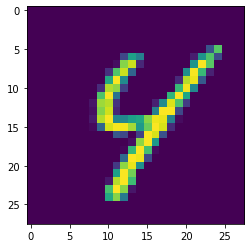

In [29]:
import matplotlib.pyplot as plt
plt.imshow(X[8].view(28, 28))

In [30]:
torch.argmax(net(X[8].view(-1, 784)))

tensor(4)